In [1]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
from PIL import Image
import requests
import torch

In [2]:
checkpoint = "openai/clip-vit-large-patch14"
model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


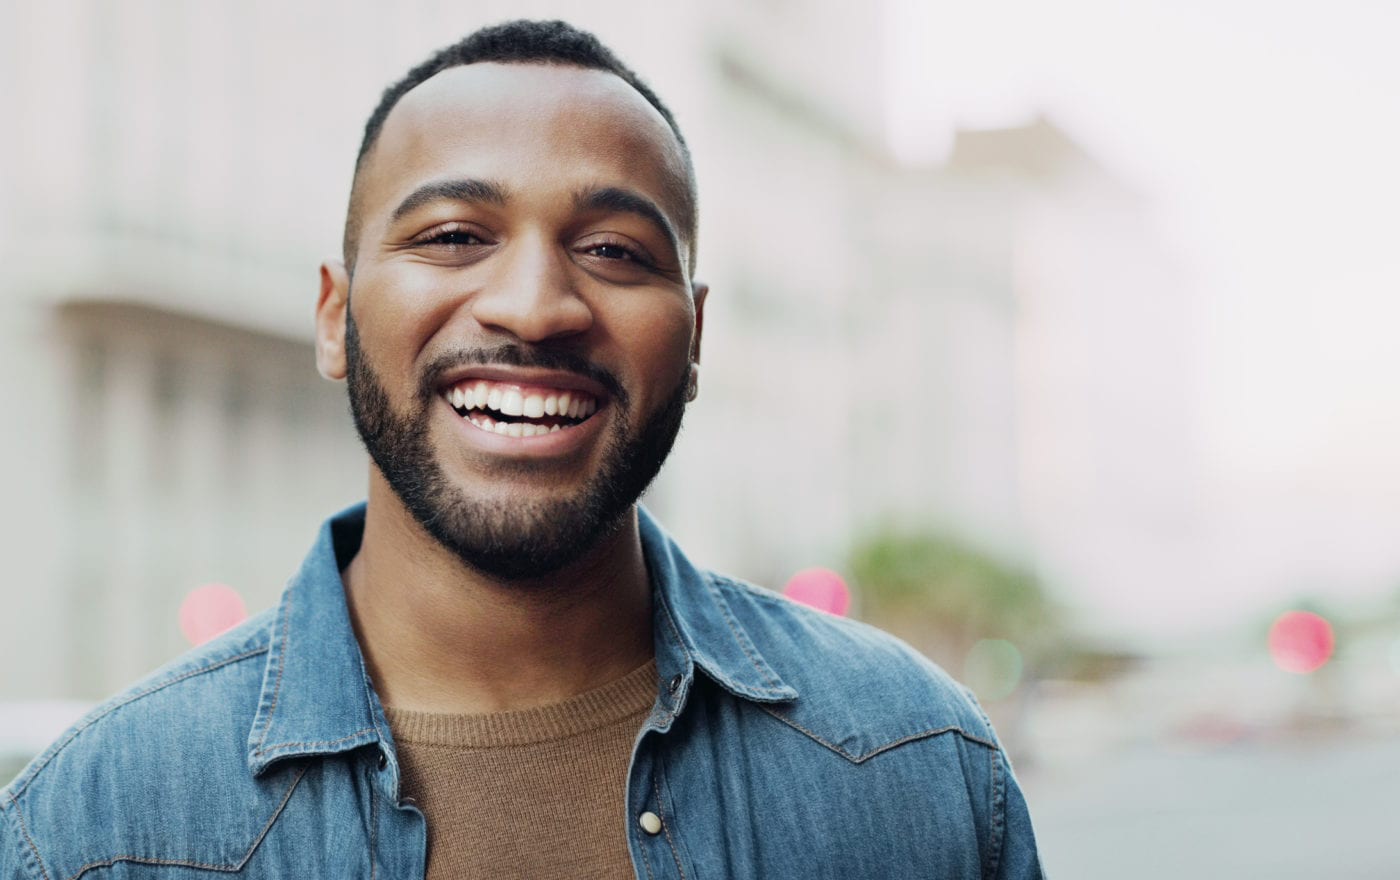

In [3]:
url = "https://www.allprodad.com/wp-content/uploads/2021/03/05-12-21-happy-people.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image

In [5]:
candidate_labels = ["happy", "sad", "angry", "shocked", "neutral"]
inputs = processor(images=image, text=candidate_labels, return_tensors="pt", padding=True)

In [6]:
with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits_per_image[0]
probs = logits.softmax(dim=-1).numpy()
scores = probs.tolist()

result = [
    {"score": score, "label": candidate_label}
    for score, candidate_label in sorted(zip(probs, candidate_labels), key=lambda x: -x[0])
]

In [7]:
result

[{'score': 0.83297795, 'label': 'happy'},
 {'score': 0.12231839, 'label': 'neutral'},
 {'score': 0.030556625, 'label': 'sad'},
 {'score': 0.0082451645, 'label': 'shocked'},
 {'score': 0.0059019173, 'label': 'angry'}]